# RKKY

In this tutorial we demonstrate how to use RKKY energy term in ubermag simulations. We start by importing the modules we are going to use. Please note that we are importing `random` as well, so we can initialise our magnetisation as a random state.

In [60]:
import random
import discretisedfield as df
import micromagneticmodel as mm
import oommfc as mc

random.seed(2)  # this way we ensure reproducibility

Our sample consists of three subregions. More precisely, two magnetic, and a non-magnetic spacer.

In [61]:
p1 = (0, 0, 0)
p2 = (60e-9, 60e-9, 22e-9)
region = df.Region(p1=p1, p2=p2)
subregions={'bottom': df.Region(p1=(0, 0, 0), p2=(100e-9, 100e-9, 10e-9)),
            'spacer': df.Region(p1=(0, 0, 10e-9), p2=(100e-9, 100e-9, 12e-9)),
            'top': df.Region(p1=(0, 0, 12e-9), p2=(100e-9, 100e-9, 22e-9))}
mesh = df.Mesh(region, n=(20, 20, 11), subregions=subregions)

mesh.k3d_subregions()

Output()

Our energy equation consists of exchange, uniaxial anisotropy and RKKY energy terms. In order to define RKKY interaction, we have to pass `sigma` and `sigma2` parameters, as well as subregions between which RKKY occurs. More precisely, by passing two subregions, two closest mutually facing surfaces are going to be identified automatically. In addition, please note that we set up norm of the field using a dictionary and the value using a `lambda` function. We could have done the same thing by writing full Python functions, but here we want to show that there are many different ways how a field can be defined.

In [62]:
system = mm.System(name='rkky')
system.energy = mm.Exchange(A=1e-12) + mm.RKKY(sigma=-1e-4, sigma2=0, subregions=['bottom', 'top']) + mm.UniaxialAnisotropy(K=1e5, u=(1, 0, 0))# + mm.Demag()

norm = {'bottom': 8e6, 'top': 8e6, 'spacer': 0}
system.m = df.Field(mesh, dim=3, value=lambda point: [2*random.random()-1 for i in range(3)], norm=norm)

The initial magnetisation is:

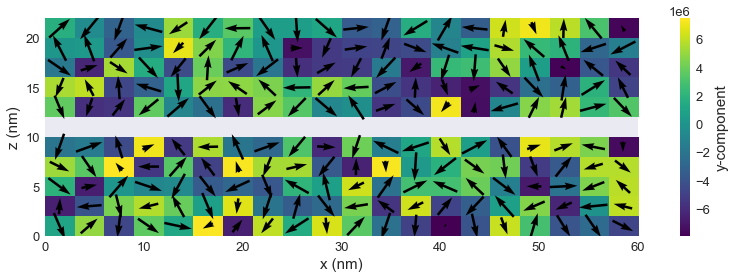

In [63]:
system.m.plane('y').mpl(figsize=(15, 4))

And the energy equation:

In [64]:
system.energy

Exchange(A=1e-12) + RKKY(sigma=-0.0001, sigma2=0, subregions=['bottom', 'top']) + UniaxialAnisotropy(K=100000.0, u=(1, 0, 0))

Now we can relax the system, and plot its magnetisation.

In [65]:
md = mc.MinDriver()
md.drive(system)

Running OOMMF (ExeOOMMFRunner) [2020/07/01 20:28]... (2.4 s)


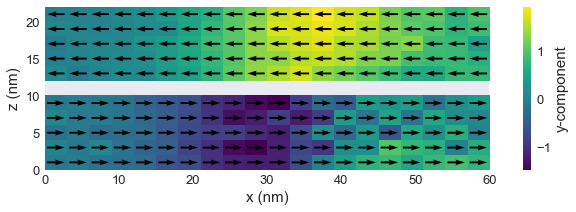

In [66]:
system.m.plane('y').mpl(figsize=(12, 3))

We can see that two layers are "antiferromagnetically coupled" because we used negative $\sigma$.